# Dithering to proper position

This notebook demonstrates how to recover the proper position of the fiber using a 2D gaussian fit.

In [11]:
import astropy.units as u
import numpy as np
import yaml
import random
import sys
import scipy.optimize as opt
import matplotlib.pyplot as plt
from matplotlib import rcParams
# add dithering module to path and load it
sys.path.append('./../../py')
import dithering

# general plotting options 
rcParams.update({'figure.autolayout': True})
my_cmap = plt.cm.jet
my_cmap.set_under('white',.01)
my_cmap.set_over('white', 300)
my_cmap.set_bad('white')

dithering = dithering.dithering(config_file="../../config/desi-noblur-nooffset.yaml")
random_ = 50.

The results show that the distributions are gaussian. It should be noted that this is independent of the choice of the random offsets even though it may seem so. The random offset distributions manifest on the number of events in each bin of the 2D histogram (shown in color bars)

That having established, the script below randomly moves the fiber off the focal coordinates; then using the distributions above, the fiber will be moved multiple times (corresponding to several exposures) to find the correct focal coordinates maximizing SNR.

In [18]:
# define the source to be observed
source_type       = "elg"
half_light_radius = 0.3
source_alt = 11.
source_az  = 13.

# define the observing conditions
boresight_alt = 10.
boresight_az  = 12.

# generate the random offset but not reveal it to user until the end
x_offset = random.gauss(0, 1.) * random_
y_offset = random.gauss(0, 1.) * random_

In [19]:
# Generate the source to be observed
if source_type == "qso" or source_type == "QSO":
    source    = dithering.generate_source(disk_fraction=0., bulge_fraction=0., 
                                          half_light_disk=0., half_light_bulge=0.)
elif source_type == "elg" or source_type == "ELG":
    source    = dithering.generate_source(disk_fraction=1., bulge_fraction=0., 
                                          half_light_disk=half_light_radius, half_light_bulge=0.)
elif source_type == "lrg" or source_type == "LRG":
    source    = dithering.generate_source(disk_fraction=0., bulge_fraction=1., 
                                          half_light_disk=0., half_light_bulge=half_light_radius)

In [20]:
def twoD_Gaussian(xy_tuple, amplitude, xo, yo):
    (x, y) = xy_tuple
    xo = float(xo)
    yo = float(yo)
    amplitude = float(amplitude)
    sigma_x = random_
    sigma_y = random_
    g = amplitude * np.exp( - ( (x-xo)**2/(2*sigma_x**2) + (y-yo)**2/(2*sigma_y**2) ) )#            ((x-xo)/sigma_x**2) - ((y-yo)/sigma_y**2))
    return g.ravel()

fiber placement before test: [26.115215546009363, -50.309298134200596]


/home/tyapici/anaconda/anaconda3/envs/desi/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


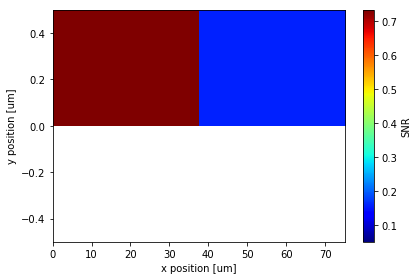

/home/tyapici/anaconda/anaconda3/envs/desi/lib/python3.5/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/tyapici/Projects/desi/code/specsim/specsim/simulator.py:552: RuntimeWarning: divide by zero encountered in true_divide
  source_flux_to_photons.T * camera.throughput)).T
/home/tyapici/Projects/desi/code/specsim/specsim/simulator.py:556: RuntimeWarning: invalid value encountered in multiply
  output['flux_calibration'] * output['num_source_electrons'])


Number of dithering points: 2
Optimization found the following:
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : 9.411049900839227 um, 35223.8213426021 um
With the current configuration, SNR are:
-- camera r: 0.000 / 0.5 Angstrom
-- camera z: 0.000 / 0.5 Angstrom
-- camera b: 0.000 / 0.5 Angstrom
If there was not error (offset):
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : 0.0 um, 0.0 um
With the current configuration, SNR are:
-- camera r: 1.426 / 0.5 Angstrom
-- camera z: 1.048 / 0.5 Angstrom
-- camera b: 1.769 / 0.5 Angstrom


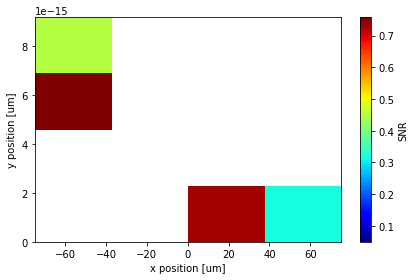

Number of dithering points: 4
Optimization found the following:
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : 10.660004801547004 um, 35279.550248422376 um
With the current configuration, SNR are:
-- camera r: 0.000 / 0.5 Angstrom
-- camera z: 0.000 / 0.5 Angstrom
-- camera b: 0.000 / 0.5 Angstrom
If there was not error (offset):
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : 0.0 um, 0.0 um
With the current configuration, SNR are:
-- camera r: 1.426 / 0.5 Angstrom
-- camera z: 1.048 / 0.5 Angstrom
-- camera b: 1.769 / 0.5 Angstrom


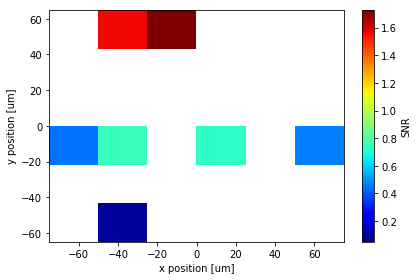

Number of dithering points: 6
Optimization found the following:
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : -4.328488922613179 um, 11.191144990630598 um
With the current configuration, SNR are:
-- camera r: 1.346 / 0.5 Angstrom
-- camera z: 0.989 / 0.5 Angstrom
-- camera b: 1.669 / 0.5 Angstrom
If there was not error (offset):
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : 0.0 um, 0.0 um
With the current configuration, SNR are:
-- camera r: 1.426 / 0.5 Angstrom
-- camera z: 1.048 / 0.5 Angstrom
-- camera b: 1.769 / 0.5 Angstrom


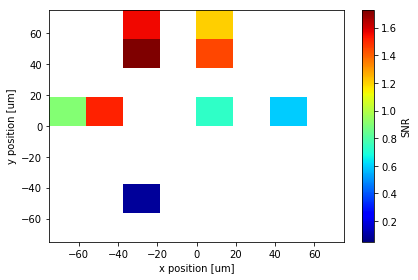

Number of dithering points: 8
Optimization found the following:
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : -4.9451211058801405 um, 10.72789201258523 um
With the current configuration, SNR are:
-- camera r: 1.347 / 0.5 Angstrom
-- camera z: 0.990 / 0.5 Angstrom
-- camera b: 1.671 / 0.5 Angstrom
If there was not error (offset):
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : 0.0 um, 0.0 um
With the current configuration, SNR are:
-- camera r: 1.426 / 0.5 Angstrom
-- camera z: 1.048 / 0.5 Angstrom
-- camera b: 1.769 / 0.5 Angstrom


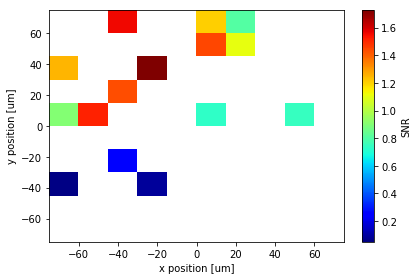

Number of dithering points: 10
Optimization found the following:
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : -5.2037188405525185 um, 10.859305297020747 um
With the current configuration, SNR are:
-- camera r: 1.344 / 0.5 Angstrom
-- camera z: 0.988 / 0.5 Angstrom
-- camera b: 1.667 / 0.5 Angstrom
If there was not error (offset):
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : 0.0 um, 0.0 um
With the current configuration, SNR are:
-- camera r: 1.426 / 0.5 Angstrom
-- camera z: 1.048 / 0.5 Angstrom
-- camera b: 1.769 / 0.5 Angstrom


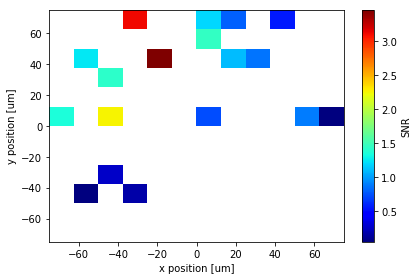

Number of dithering points: 12
Optimization found the following:
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : -5.228630551594293 um, 10.947872197495904 um
With the current configuration, SNR are:
-- camera r: 1.343 / 0.5 Angstrom
-- camera z: 0.987 / 0.5 Angstrom
-- camera b: 1.666 / 0.5 Angstrom
If there was not error (offset):
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : 0.0 um, 0.0 um
With the current configuration, SNR are:
-- camera r: 1.426 / 0.5 Angstrom
-- camera z: 1.048 / 0.5 Angstrom
-- camera b: 1.769 / 0.5 Angstrom


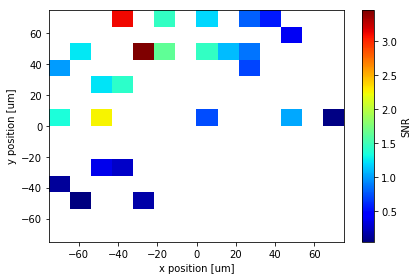

Number of dithering points: 14
Optimization found the following:
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : -5.2172905574479245 um, 10.984935040379504 um
With the current configuration, SNR are:
-- camera r: 1.343 / 0.5 Angstrom
-- camera z: 0.987 / 0.5 Angstrom
-- camera b: 1.666 / 0.5 Angstrom
If there was not error (offset):
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : 0.0 um, 0.0 um
With the current configuration, SNR are:
-- camera r: 1.426 / 0.5 Angstrom
-- camera z: 1.048 / 0.5 Angstrom
-- camera b: 1.769 / 0.5 Angstrom


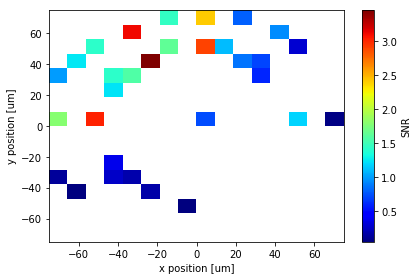

Number of dithering points: 16
Optimization found the following:
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : -5.372869180644642 um, 11.007034179777676 um
With the current configuration, SNR are:
-- camera r: 1.342 / 0.5 Angstrom
-- camera z: 0.986 / 0.5 Angstrom
-- camera b: 1.665 / 0.5 Angstrom
If there was not error (offset):
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : 0.0 um, 0.0 um
With the current configuration, SNR are:
-- camera r: 1.426 / 0.5 Angstrom
-- camera z: 1.048 / 0.5 Angstrom
-- camera b: 1.769 / 0.5 Angstrom


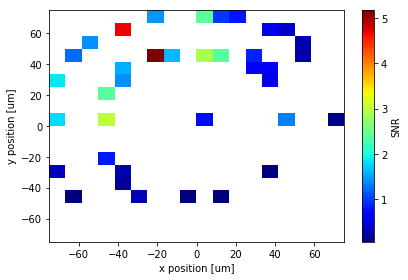

Number of dithering points: 18
Optimization found the following:
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : -5.41751780252563 um, 11.035805289214451 um
With the current configuration, SNR are:
-- camera r: 1.341 / 0.5 Angstrom
-- camera z: 0.986 / 0.5 Angstrom
-- camera b: 1.664 / 0.5 Angstrom
If there was not error (offset):
boresight position is   : 10.000 deg , 12.000 deg
source position is      : 11.000 deg , 13.000 deg
fiber position is       : 248.752 mm , 253.785 mm
focal plane position is : 248.752 mm , 253.785 mm
fiber placement         : 0.0 um, 0.0 um
With the current configuration, SNR are:
-- camera r: 1.426 / 0.5 Angstrom
-- camera z: 1.048 / 0.5 Angstrom
-- camera b: 1.769 / 0.5 Angstrom


In [21]:
dithering.set_boresight_position(boresight_alt*u.deg, boresight_az*u.deg)
dithering.set_source_position(source_alt*u.deg, source_az*u.deg)
dithering.set_focal_plane_position()
dithering.set_theta_0(-5.*u.deg)
dithering.set_phi_0(10.*u.deg)
SNR = []
x   = []
y   = []

# initial point
dithering.place_fiber([x_offset, y_offset])
dithering.run_simulation(source_type, *source, report=False)
SNR.append(np.median(dithering.SNR['b'][0]))
x.append(0)
y.append(0)
print("fiber placement before test: {0}".format(dithering.fiber_placement))
# dithering
search_radia = [random_, random_*1.5]
for num_dithering in range(1,10):
    for i in range(num_dithering):
        x_dither = search_radia[0] * np.cos((360./num_dithering)*i*u.deg)
        y_dither = search_radia[0] * np.sin((360./num_dithering)*i*u.deg)
        dithering.place_fiber([x_offset+x_dither, y_offset+y_dither])
        dithering.run_simulation(source_type, *source, report=False)
        SNR.append(np.median(dithering.SNR['b'][0]))
        x.append(x_dither)
        y.append(y_dither)
        x_dither = search_radia[1] * np.cos((360./num_dithering)*i*u.deg)
        y_dither = search_radia[1] * np.sin((360./num_dithering)*i*u.deg)
        dithering.place_fiber([x_offset+x_dither, y_offset+y_dither])
        dithering.run_simulation(source_type, *source, report=False)
        SNR.append(np.median(dithering.SNR['b'][0]))
        x.append(x_dither)
        y.append(y_dither)

    plt.hist2d(x, y, weights=SNR, bins=num_dithering*2, cmap=my_cmap, vmin=0.05)
    plt.xlabel('x position [um]')
    plt.ylabel('y position [um]')
    plt.colorbar(label='SNR')
    plt.show()

    coordinates = np.vstack((np.array(x).ravel(), np.array(y).ravel()))
    data = np.array(SNR).ravel()
    initial_guess = (2., -5., -5.)
    try:
        popt, pcov = opt.curve_fit(twoD_Gaussian, coordinates, data, p0=initial_guess)
    except:
        print("NO CONVERGENCE")
        continue
    print("Number of dithering points: {0}".format(num_dithering*2))
    print("Optimization found the following:")
    dithering.place_fiber([x_offset+popt[1], y_offset+popt[2]])
    dithering.run_simulation(source_type, *source, report=True)
    print("If there was not error (offset):")
    dithering.place_fiber([0., 0.])
    dithering.run_simulation(source_type, *source, report=True)
    print("====================================================")

### Conclusion

In 6 ditherings, optimal position can be found. Since it is a non-linear problem, less than 6 dithering did not return sufficiently good results. More than 6 dithering is over-constraning and not needed.